<a href="https://colab.research.google.com/github/joysaikat/Data_Science/blob/master/fastAI_ch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
!pip install -Uqq fastbook
!pip install fastcore==1.0.9 
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 2.8MB/s 
     |████████████████████████████████| 1.0MB 9.7MB/s 
     |████████████████████████████████| 358kB 17.1MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 40kB 5.2MB/s 
     |████████████████████████████████| 92kB 8.6MB/s 
     |████████████████████████████████| 40kB 4.8MB/s 
     |████████████████████████████████| 51kB 6.2MB/s 
     |████████████████████████████████| 61kB 6.4MB/s 
     |████████████████████████████████| 2.6MB 22.6MB/s 
  Found existing installation: fastcore 1.0.13
    Uninstalling fastcore-1.0.13:
      Successfully uninstalled fastcore-1.0.13
Mounted at /content/gdrive


In [4]:
from fastbook import *
from fastai.vision.widgets import *

In [5]:
key = os.environ.get('AZURE_SEARCH_KEY', 'e0fd74f0b83849ac9a34a08d588ed9fd')

In [6]:
search_images_bing

<function fastbook.search_images_bing>

In [7]:
results = search_images_bing(key, 'grizzly bear')
ims = results.attrgot('content_url')
len(ims)

150

In [8]:
ims = ['http://3.bp.blogspot.com/-S1scRCkI3vY/UHzV2kucsPI/AAAAAAAAA-k/YQ5UzHEm9Ss/s1600/Grizzly%2BBear%2BWildlife.jpg']

In [9]:
dest = '/content/gdrive/My Drive/Colab Notebooks/fastai/images/grizzly.jpg'
download_url(ims[0], dest)

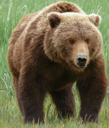

In [10]:
im = Image.open(dest)
im.to_thumb(128,128)

In [11]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [12]:
if not path.exists():
    path.mkdir()
    for o in bear_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} bear')
        download_images(dest, urls=results.attrgot('content_url'))

In [13]:
fns = get_image_files(path)
fns

(#442) [Path('bears/black/00000014.jpg'),Path('bears/black/00000148.jpg'),Path('bears/black/00000067.jpg'),Path('bears/black/00000093.jpg'),Path('bears/black/00000036.jpg'),Path('bears/black/00000100.jpg'),Path('bears/black/00000083.jpg'),Path('bears/black/00000145.jpg'),Path('bears/black/00000069.JPG'),Path('bears/black/00000074.jpg')...]

In [14]:
failed = verify_images(fns)
failed

(#14) [Path('bears/black/00000067.jpg'),Path('bears/black/00000132.jpg'),Path('bears/black/00000032.jpg'),Path('bears/black/00000033.jpg'),Path('bears/black/00000052.jpg'),Path('bears/grizzly/00000069.jpg'),Path('bears/grizzly/00000020.jpg'),Path('bears/teddy/00000037.jpg'),Path('bears/teddy/00000001.jpg'),Path('bears/teddy/00000061.jpg')...]

In [15]:
failed.map(Path.unlink);

In [16]:
bears = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [17]:
dls = bears.dataloaders(path)

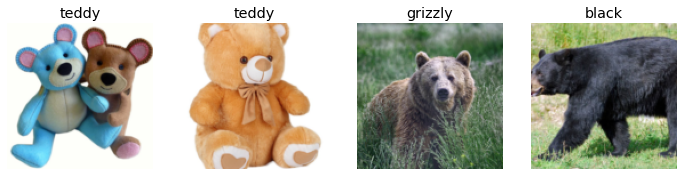

In [18]:
dls.valid.show_batch(max_n=4, nrows=1)

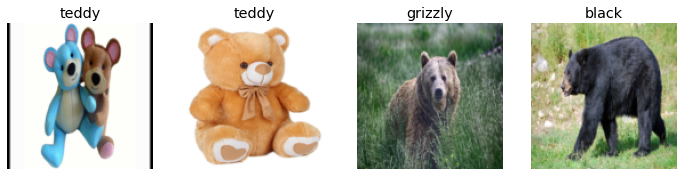

In [19]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

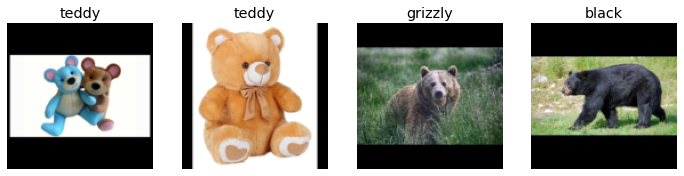

In [20]:
bears = bears.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = bears.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

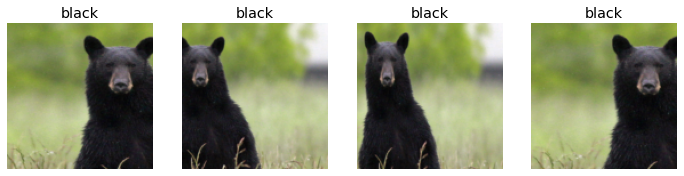

In [21]:
bears = bears.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

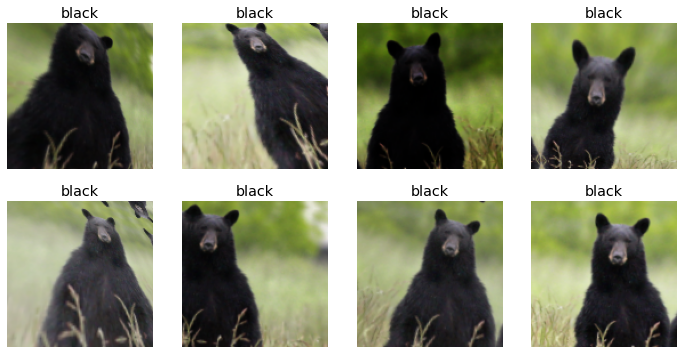

In [22]:
bears = bears.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = bears.dataloaders(path)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [23]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,1.708135,0.066660,0.035294,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.390355,0.016120,0.000000,00:16
1,0.368931,0.004684,0.000000,00:15
2,0.311170,0.007236,0.000000,00:16
3,0.269284,0.010035,0.000000,00:15


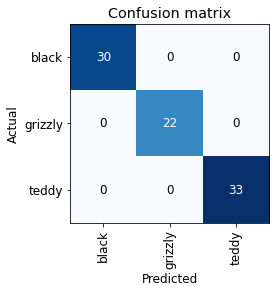

In [24]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

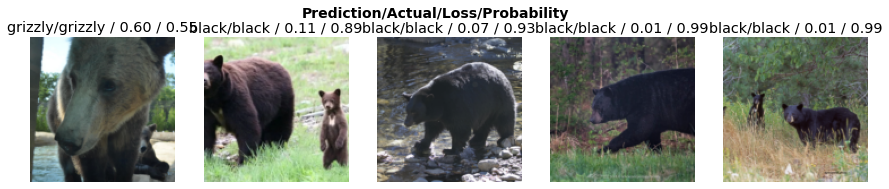

In [25]:
interp.plot_top_losses(5, nrows=1)

In [26]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [27]:
# to delete (unlink) all images selected for deletion, we would run:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [28]:
# To move images for which we've selected a different category, we would run:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [29]:
learn.export()

In [30]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [31]:
learn_inf = load_learner(path/'export.pkl')

In [32]:
learn_inf.predict('/content/gdrive/My Drive/Colab Notebooks/fastai/images/grizzly.jpg')

('grizzly', tensor(1), tensor([8.1757e-04, 9.9908e-01, 1.0143e-04]))

In [33]:
learn_inf.dls.vocab

(#3) ['black','grizzly','teddy']

In [34]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [35]:
img = PILImage.create(btn_upload.data[-1])

In [36]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [37]:
pred,pred_idx,probs = learn_inf.predict(img)

In [38]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.25f}'
lbl_pred

Label(value='Prediction: grizzly; Probability: 0.9990808963775634765625000')

In [39]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [40]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.30f}'

btn_run.on_click(on_click_classify)

In [41]:
btn_upload = widgets.FileUpload()